<a href="https://colab.research.google.com/github/MidoriTinto/Python_Fundamentals/blob/main/Copy_of_8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [40]:
!pip install --upgrade openpyxl

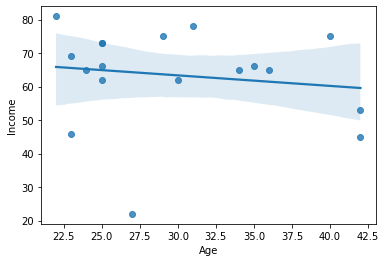

In [41]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df=pd.read_excel(url, sheet_name="county-level")
county_level_df

x=county_level_df["Age"]
y=county_level_df["Income"]

regression=linregress(x,y) 
slope= regression.slope
intercept=regression.intercept
regression

chart=sns.regplot(x=x, y=y)
chart.set_xlabel('Age')
chart.set_ylabel('Income')
chart


LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [42]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df=pd.read_excel(url, sheet_name="county-level")
county_level_df

x=county_level_df["Population"]
y=county_level_df["Income"]

regression=linregress(x,y) 
slope= regression.slope
intercept=regression.intercept
regression

LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115)


There is even less correlation between Age and Income

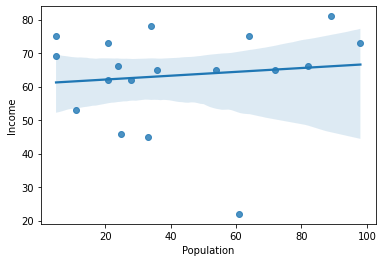

In [44]:
chart=sns.regplot(x=x, y=y)
chart.set_xlabel('Population')
chart.set_ylabel('Income')
chart


### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [ ]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
pos_psych=pd.read_csv(url)
pos_psych
pos_psych.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


In [ ]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
pos_psych=pd.read_csv(url)

x=pos_psych["Stress"]
y=pos_psych["Wellbeing"]

regression=linregress(x,y) 
slope= regression.slope
intercept=regression.intercept
regression

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

In [33]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
pos_psych=pd.read_csv(url)

def regr_psych():
  
  x=pos_psych["Stress"]
  y=pos_psych["Wellbeing"]
  
  regression=linregress(x,y) 
  slope= regression.slope
  intercept=regression.intercept
  return regression, "model is significant, p < .05: 6.084540561441803e-07"


regr_psych()


(LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022),
 'model is significant, p < .05: 6.084540561441803e-07')

# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

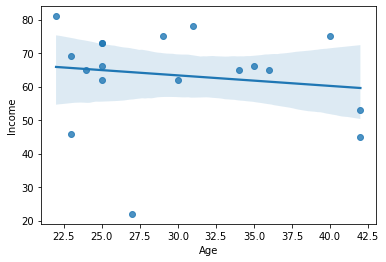

In [53]:

from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df=pd.read_excel(url, sheet_name="county-level")
county_level_df

x=county_level_df["Age"]
y=county_level_df["Income"]

regression=linregress(x,y) 
slope= regression.slope
intercept=regression.intercept
regression

chart=sns.regplot(x=x, y=y)
chart.set_xlabel('Age')
chart.set_ylabel('Income')
chart




Is age closely related to income?
There is a negative correlation between age and income (r=-0.147) in the data set given. The slope of the line shows value also meaning that income does not increase with age or rather slowly stagnates the older one get (slope=-0.31). Also the probabilty that this correlation in data occurs by chance is quite high (p=0.5)

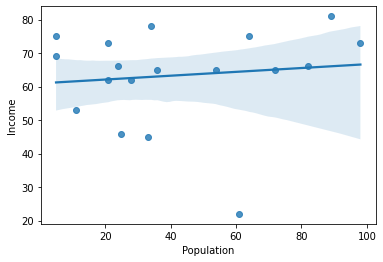

In [39]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df=pd.read_excel(url, sheet_name="county-level")
county_level_df

x=county_level_df["Population"]
y=county_level_df["Income"]

regression=linregress(x,y) 
slope= regression.slope
intercept=regression.intercept
regression

chart=sns.regplot(x=x, y=y)
chart.set_xlabel('Population')
chart.set_ylabel('Income')
chart

Could Population predict Income?
There is a slight positive correlation between population and income (r=0.1164) in the data set given. Also a slight increase in income can be seen the larger the population (slope=0.05). However, the probability that the correlation between Population and Income in the data occurred by chance is relatively high which means that the correlation seen is not significant (p=0.65 or p>0.05)

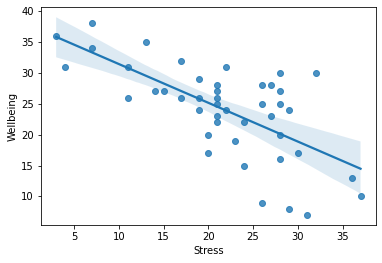

In [1]:
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
pos_psych=pd.read_csv(url)

def regr_psych():
  
  x=pos_psych["Stress"]
  y=pos_psych["Wellbeing"]
  
  regression=linregress(x,y) 
  slope= regression.slope
  intercept=regression.intercept
  regression
  
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('Stress')
  chart.set_ylabel('Wellbeing')
  chart





regr_psych()


Does Stress predicts Wellbeing? There is a positive correlation between Stress and Wellbeing (r=0.67) in the data set given. The higher the stress levels are the less wellbeing there is (slope=-0.6). The probability that there is indeed a correlation between Stress and Wellbeing is significant (p < .05: 6.084540561441803e-07 ).

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)